<img src="image.png" width="50%" alt=""/>

## Exploring Weather Trends in Berlin


Ekaterina Kuznetsova | Data Analist Nanodegree | 06.10.2021

## Summary
In this project, we will analyze local and global temperature data and compare the temperature trends of Seattle city to overall global temperature trends. 

## Content

<ul>
<li> Data Extraction </li>
<li> Open up the CSV </li>
<li> Create a line chart</li>
<li> Make observations </li>
</ul>



## Data Extraction

There are three tables in the given database:
<ol>
  <li> city_list -  contains a list of cities and countries in the database.</li>
  <li> city_data - contains the average temperatures for each city by year (ºC).</li>
  <li> global_data - This contains the average global temperatures by year (ºC).</li>
</ol>

This SQL commands were used to extract the data from tables. 

> #### Extracting the average global temperature from the table global_data
>
> SELECT * FROM global_data
>

> #### Extracting the average temperatures of the city from the table city_data
>
> SELECT year,avg_temp FROM city_data
>
> WHERE city = 'Berlin'


## Open the CSV

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import csv
import os

berlin_data = os.path.abspath('berlin_data.csv')
general_data = os.path.abspath('general_data.csv')

# read csv
berlin = pd.read_csv(berlin_data)
general = pd.read_csv(general_data)

# print first 5 rows of the tabel
print(berlin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      271 non-null    int64  
 1   avg_temp  267 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.4 KB
None


In [2]:
# Merging 2 csv files

merged = berlin.merge(general, on='year')
result = merged.to_csv('result.csv', index=False)
result = pd.read_csv('result.csv')
print(result.head())

# Rename columns
result1 = result.rename(columns={'year':'Year','avg_temp_x':'Berlin','avg_temp_y':'General'})
result1.to_csv('result1.csv',header=True, sep=',')
print(result1.head())
print(result1.shape)

   year  avg_temp_x  avg_temp_y
0  1750        9.83        8.72
1  1751        9.75        7.98
2  1752        4.84        5.78
3  1753        8.72        8.39
4  1754        8.49        8.47
   Year  Berlin  General
0  1750    9.83     8.72
1  1751    9.75     7.98
2  1752    4.84     5.78
3  1753    8.72     8.39
4  1754    8.49     8.47
(264, 3)


We get a table with general and Berln weather data from 1750 till 2013 year.

## Moving Averages
<ul>
<p> 10 year moving average is used to smooth out data in the csv - file </p>
<p> This term  make trends more clear and shows less fluctuations in data.  </p>
</ul>

>Sample Formula for 10-year MA in EXCEL = AVERAGE (B9:B19)
>
<img src="excel.png" width="40%" alt=""/>


## Create a line Chart / Visualisation

Creating a line chart that compares Berlin temperatures with the global temperatures. 
In this case I will  plot the moving average and the yearly averages in order to smooth out the lines, making trends more observable (the last concept in the previous lesson goes over how to do this in a spreadsheet). 
I make it specially for comparing yearly averages with moving averages.

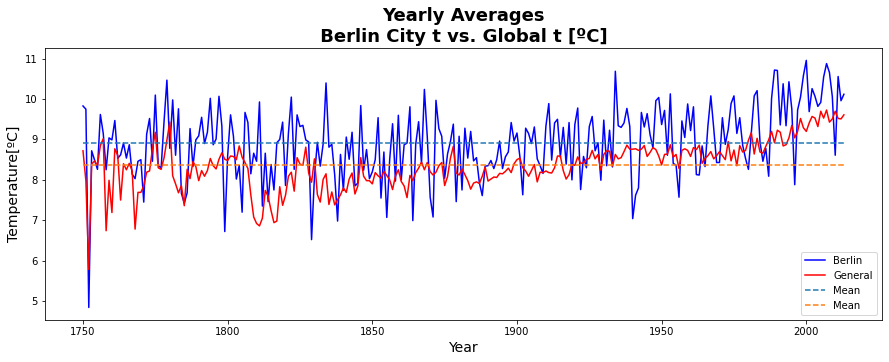

In [3]:
# Yearly Averages
plt.figure(figsize=(15,5))
plt.title(r"Yearly Averages" "\n" r" Berlin City t vs. Global t [ºC] ", fontdict={'fontweight':'bold', 'fontsize': 18})
plt.plot(result1.Year, result1.Berlin, 'b-', label='Berlin')
plt.plot(result1.Year, result1.General, 'r-', label='General')

plt.xlabel('Year', fontsize = 14)
plt.ylabel('Temperature[ºC]', fontsize = 14)

# Calculate the simple average of the data
b_mean = [np.mean(result1.Berlin)]*len(result1.Year)
g_mean = [np.mean(result1.General)]*len(result1.Year)
# Plot the average line

mean_berlin = plt.plot(result1.Year,b_mean, label='Mean', linestyle='--')
mean_general = plt.plot(result1.Year,g_mean, label='Mean', linestyle='--')
plt.legend()
plt.savefig('yearly.jpg')

0.5159464209833218
10.96
9.73


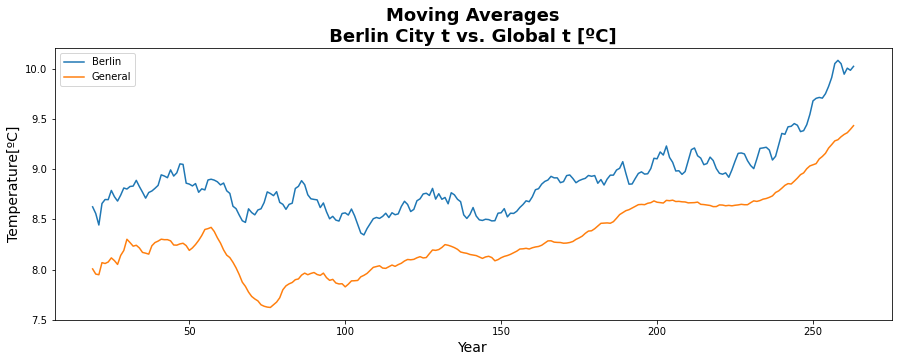

In [4]:
# Moving Averages
plt.figure(figsize=(15,5))
# Setting the window width to 20.
plt.title(r"Moving Averages" "\n" r" Berlin City t vs. Global t [ºC] ", fontdict={'fontweight':'bold', 'fontsize': 18})

result1['Berlin'].rolling(window = 20).mean().plot()
result1['General'].rolling(window = 20).mean().plot()

plt.xlabel('Year', fontsize = 14)
plt.ylabel('Temperature[ºC]', fontsize = 14)

plt.legend()
plt.savefig('moving_averages.jpg')

# Correlation between General and Berlin temperature
correlation = result1['Berlin'].corr(result1['General'])
print(correlation)

# Finding max temperature
max_value_b = result1['Berlin'].max()
max_value_g = result1['General'].max()
print(max_value_b)
print(max_value_g)

## Conclusion

Visual comparsion let us make 4 clear conclusions:
<ol>
  <li> Berlin Temperature is generally  higher than Global Temperature. </li>
  <li> Global Trend - Temperature growing </li>
  <li> Moving Averages in 10 years let us better to see t distribution than yarly average </li>
  <li> Berlin  and World temperature moderately correlated with each other </li>
</ol>

Berlin is hotter than worldaverages. And this difference has been consistent over time.
Temperature changes over Time (Based on 20 years moving average) LINE CHART showing Different City Temperatures against Global Temperature. 
Maximum yearly temperature in Berlin was in year 2010 and made 10,96ºC as we can forecast from moving averages plot that is not a record nowadays. General temperature maximum was in year 2015 and made 9,83ºC. Important to notice that the last entry in thr Database was made in year 2015 and we can also guess based on theline chart that this temperature record was broken.

*What's the correlation coefficient?*
> According to the Formula: correlation = result1['Berlin'].corr(result1['General'])
> we get result  =  0.5159464209833218

That means that variables considered __moderately correlated__ and is on the boarder a low correlation, because we have 0.5 < |r| < 0.7.